In [1]:
import csv
import pandas as pd


data = []
with open('A.csv', 'r') as file:
    file_reader = csv.reader(file)

    for i in file_reader:
        data.append(i)




In [2]:
dataframe = {
    'Date': [i[0] for i in data[1:]],
    'Low': [i[1] for i in data[1:]], 
    'Open': [i[2] for i in data[1:]],
    'Volume': [i[3] for i in data[1:]],
    'High': [i[4] for i in data[1:]],
    'Close': [i[5] for i in data[1:]],
    'Adjusted Close': [i[6] for i in data[1:]]
}

pd.DataFrame(dataframe)



,Date,Low,Open,Volume,High,Close,Adjusted Close
0,18-11-1999,28.612302780151367,32.54649353027344,62546380,35.765380859375,31.473533630371094,27.06658172607422
1,19-11-1999,28.47818374633789,30.713518142700195,15234146,30.75822639465332,28.880544662475586,24.83666229248047
2,22-11-1999,28.65700912475586,29.551143646240234,6577870,31.473533630371094,31.473533630371094,27.06658172607422
3,23-11-1999,28.612302780151367,30.400571823120117,5975611,31.205293655395508,28.612302780151367,24.605979919433594
4,24-11-1999,28.612302780151367,28.701717376708984,4843231,29.998212814331055,29.372318267822266,25.259572982788086
...,...,...,...,...,...,...,...
5799,06-12-2022,149.91000366210938,152.14999389648438,1172300,153.0,151.35000610351562,151.35000610351562
5800,07-12-2022,151.1300048828125,151.22999572753906,1011100,154.35000610351562,153.72999572753906,153.72999572753906
5801,08-12-2022,153.47999572753906,154.4199981689453,1289900,156.99000549316406,156.27999877929688,156.27999877929688
5802,09-12-2022,152.67999267578125,155.6699981689453,1020200,156.6999969482422,152.9499969482422,152.9499969482422


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np

X = np.array([i[1:6] for i in data[1:]], dtype=float)
y = np.array([i[6:] for i in data[1:]],dtype=float)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

# Normalisasi Min-Max untuk X

X_normalized = np.round(scaler.fit_transform(X), 3)

# Normalisasi Min-Max untuk y

y_normalized = np.round(scaler.fit_transform(y), 3)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Dense(32, input_shape=[5,]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
from tensorflow.keras.losses import Huber

model.compile(optimizer='adam', loss='mean_absolute_error')

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
146/146 [==============================] - 3s 7ms/step - loss: 0.0911 - val_loss: 0.0152
Epoch 2/50
146/146 [==============================] - 1s 4ms/step - loss: 0.0245 - val_loss: 0.0300
Epoch 3/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0191 - val_loss: 0.0160
Epoch 4/50
146/146 [==============================] - 1s 4ms/step - loss: 0.0173 - val_loss: 0.0254
Epoch 5/50
146/146 [==============================] - 1s 4ms/step - loss: 0.0153 - val_loss: 0.0223
Epoch 6/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0151 - val_loss: 0.0135
Epoch 7/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0145 - val_loss: 0.0205
Epoch 8/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0131 - val_loss: 0.0310
Epoch 9/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0134 - val_loss: 0.0196
Epoch 10/50
146/146 [==============================] - 1s 5ms/step - loss: 0.0124 - val_loss: 0.0199

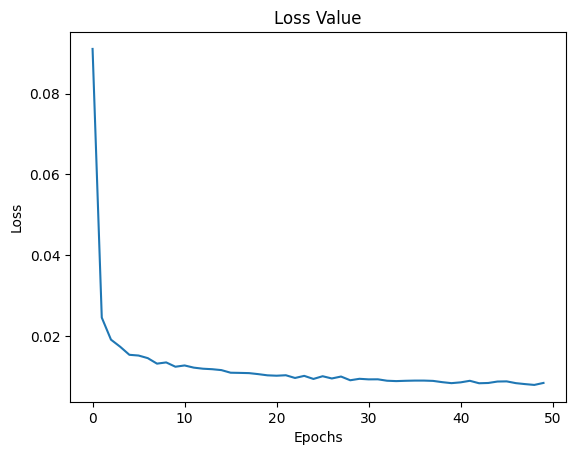

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss Value')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [13]:
model.save('BestModel.h5')

In [14]:
from tensorflow.keras.models import load_model

In [16]:
loaded_model = load_model('BestModel.h5')

In [17]:
# saya ambil contoh input fitur baru
# fiturnya berupa secara berurutan low, open, volume, high, close
scaler.fit(X)
input_X = scaler.transform([[27.23, 30.54, 61894572,40.89,34.71]])

In [18]:
scaler.fit(y)
scaler.inverse_transform(loaded_model.predict(input_X))

1/1 [==============================] - 0s 220ms/step


array([[26.740688]], dtype=float32)

In [19]:
# ketika saya input data 
# low = 27.23
# open = 30.54
# volume = 61_894_572
# high = 40.89
# close = 34.71

# bisa dilihat bahwa saya ingin memprediksi harga adjusted close nya artinya harga penutupan saham yang telah disesuaikan untuk memperhitungkan tindakan korporasi
# harga adjusted close adalah 26.74